In [2]:
import numpy as np
data = np.loadtxt("fnu.txt")
import math


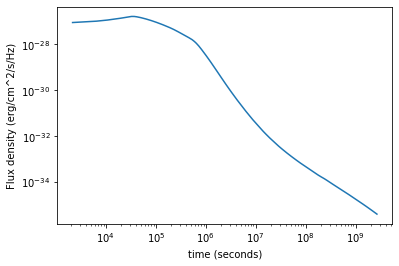

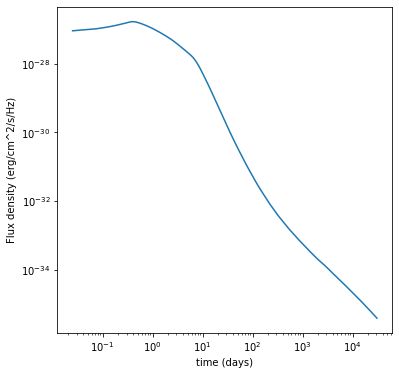

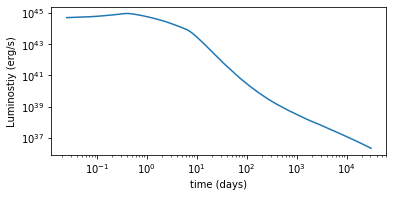

In [4]:
import matplotlib.pyplot as plt
from astropy.cosmology import Planck15

t_0 = data[:,0]
F_nu = data[:,1]

theta_0 = math.pi/18
E_52 = 80
n_0 = 1 
z = 1
theta_obs = 2*theta_0
nu = 5*pow(10,4)
nu_0 = 1*pow(10,14)

t_jet = 6.2*(1+z)*((E_52/n_0)**(1/3))*((theta_0/0.1)**(8/3))

gamma = (theta_0**(-1))*((t_0/t_jet)**(-1/2))   #equation for t_0 > t_jet
a = 1/((1+gamma**2)*(theta_obs**2))             
t = a*t_0
D = Planck15.luminosity_distance(z=1).cgs.value


a3 = (gamma*theta_obs)**(-6)


F_nu1 = a3*F_nu
t_days = t_0/(86400)       #conversion from seconds to days

L = 4*math.pi*(D**2)*nu_0*F_nu

plt.subplot(1, 1, 1)       #first plot, time in s vs. flux
plt.plot(t_0, F_nu)

plt.xlabel('Time (seconds)')
plt.ylabel('Flux density (erg/cm^2/s/Hz)')
plt.xscale('log')
plt.yscale('log')

plt.figure(figsize=(6,6))

plt.subplot(1, 1, 1)       #second plot, time in days vs. flux
plt.plot(t_days, F_nu)

plt.xlabel('Time (days)')
plt.ylabel('Flux density (erg/cm^2/s/Hz)')
plt.xscale('log')
plt.yscale('log')

plt.figure(figsize=(6,6))

plt.subplot(2,1,2)         #third subplot, time in days vs. luminosity
plt.plot(t_days, L)

plt.xlabel('Time (days)')
plt.ylabel('Luminostiy (erg/s)')
plt.xscale('log')
plt.yscale('log')


plt.show()

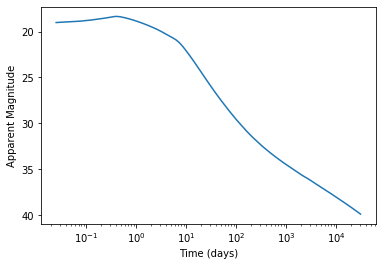

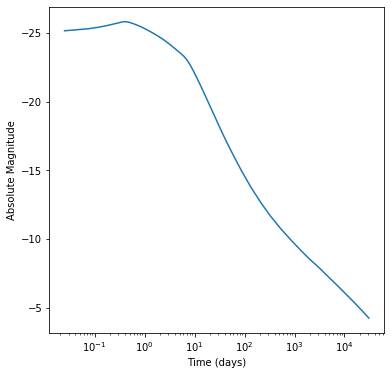

In [23]:
#Plots of apparent and absolute AB magnitudes

m_AB = -2.5*np.log10(F_nu)-48.60

d = D*(3.24078*pow(10, -19))

M_AB = m_AB-5*np.log10(d)+5

plt.subplot(1, 1, 1)
plt.plot(t_days, m_AB)          #plot of time in days vs. apparent magnitude

plt.xlabel('Time (days)')
plt.ylabel('Apparent Magnitude')
plt.xscale('log')
plt.gca().invert_yaxis()

plt.figure(figsize=(6,6))

plt.subplot(1, 1, 1)
plt.plot(t_days, M_AB)          #plot of time in days vs. absolute magnitude

plt.xlabel('Time (days)')
plt.ylabel('Absolute Magnitude')
plt.xscale('log')
plt.gca().invert_yaxis()

plt.show()
